In [1]:
# Load some of the new LF tuning data

# Load the HF datasets

# Compute metrics assessing similarity of any two datasets

In [18]:
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:

def extract_meta_df(runs: list) -> pd.DataFrame:

    rows = []

    for run in runs:
        parts = run.stem.split('_')
        alpha = float(parts[0][5:])
        beta = float(parts[1][4:])
        timestep = int(parts[-1])

        rows.append({
            'run_name': run,
            'alpha': alpha,
            'beta': beta,
            'timestep': timestep,
        })

    # Set index to run_name
    df = pd.DataFrame(rows)
    df.set_index('run_name', inplace=True)
    return df


def extract_sim_time(run: pathlib.Path) -> float:
    """Return simulation time in microseconds
    """
    sim_time = np.load(run)['simTime']
    sim_time *= 4.477124  # Multiply by time scale to get units of [us]
    return sim_time


def extract_temp_arr(run_name: pathlib.Path):
    data = np.load(run_name)
    return data['temperature']
    
    
def extract_spatial_coords(run_name: pathlib.Path):
    data = np.load(run_name)
    return data['position']


In [21]:
data_dir = pathlib.Path('/Volumes/My Passport for Mac/laser_tuning/HF')
runs = sorted(data_dir.glob('*.npz'))
df = extract_meta_df(runs)
df

,alpha,beta,timestep
run_name,,,
/Volumes/My Passport for Mac/laser_tuning/HF/alpha2.0_beta1.35_data_00000.npz,2.0,1.35,0
/Volumes/My Passport for Mac/laser_tuning/HF/alpha2.0_beta1.35_data_00500.npz,2.0,1.35,500
/Volumes/My Passport for Mac/laser_tuning/HF/alpha2.0_beta1.35_data_01000.npz,2.0,1.35,1000
/Volumes/My Passport for Mac/laser_tuning/HF/alpha2.0_beta1.35_data_01500.npz,2.0,1.35,1500
/Volumes/My Passport for Mac/laser_tuning/HF/alpha2.0_beta1.35_data_02000.npz,2.0,1.35,2000
...,...,...,...
/Volumes/My Passport for Mac/laser_tuning/HF/alpha2.4_beta1.35_data_09500.npz,2.4,1.35,9500
/Volumes/My Passport for Mac/laser_tuning/HF/alpha2.4_beta1.35_data_10000.npz,2.4,1.35,10000
/Volumes/My Passport for Mac/laser_tuning/HF/alpha2.4_beta1.35_data_10500.npz,2.4,1.35,10500


/Volumes/My Passport for Mac/laser_tuning/HF/alpha2.0_beta1.35_data_00000.npz
Temperature array shape: (176, 220, 176)


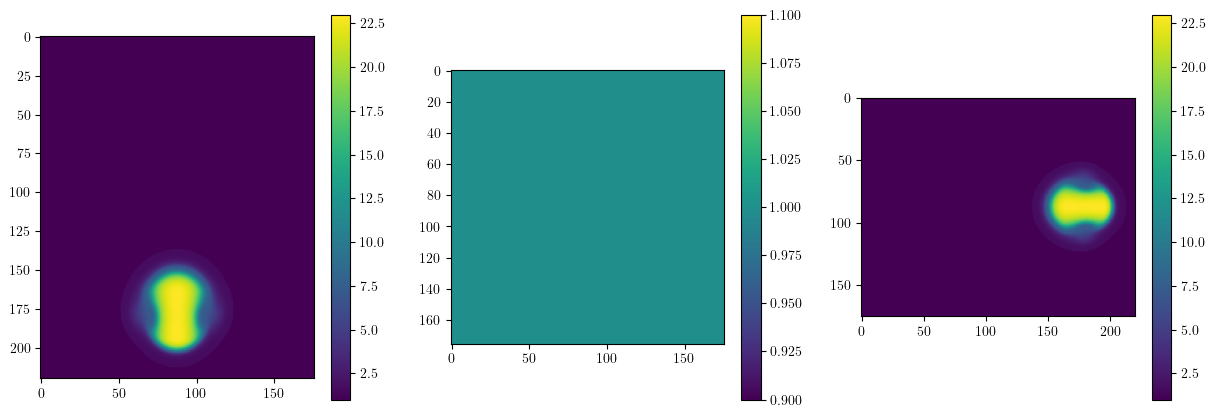

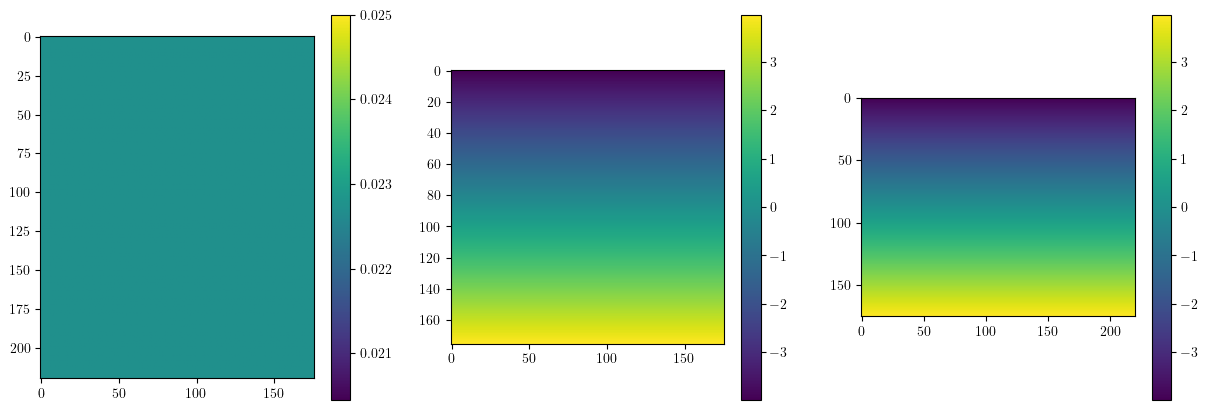

In [37]:
# In this cell we explore loading the data and extracting coordinates of each cell

test_filename = df.iloc[0, :].name
print(test_filename)


temp_arr = extract_temp_arr(test_filename)
spatial_coords = extract_spatial_coords(test_filename)

def plot_3_slice(arr):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    for i in range(3):
        arr_slice = np.take(arr, indices=arr.shape[i]//2, axis=i)
        im = ax[i].imshow(arr_slice)
        plt.colorbar(im, ax=ax[i])
    plt.show()
    
print(f"Temperature array shape: {temp_arr.shape}")
plot_3_slice(temp_arr)
plot_3_slice(spatial_coords[:, :, :, 2])

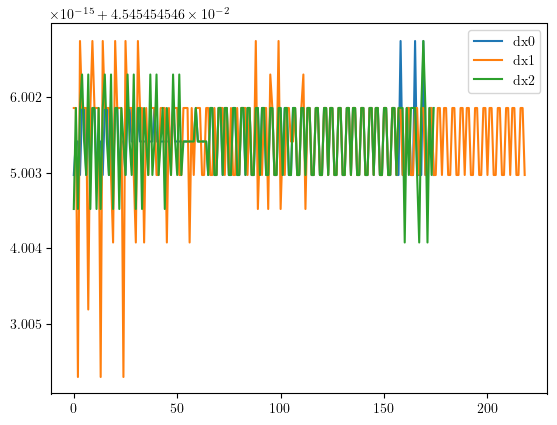

In [36]:
# Grid spacing
dx0s = np.diff(spatial_coords[:, 0, 0, 2])
dx1s = np.diff(spatial_coords[0, :, 0, 1])
dx2s = np.diff(spatial_coords[0, 0, :, 0])

plt.plot(dx0s, label='dx0')
plt.plot(dx1s, label='dx1')
plt.plot(dx2s, label='dx2')
plt.legend()
plt.show()

In [ ]:
from laser-tuning.src.utils.plotting_utils import write_isosurface_plot_from_arr